In [33]:
api_key = 'abc'

# Construct the request with headers including the API key
headers = {
    'Authorization': f'Bearer {api_key}',
    'Content-Type': 'application/json'
}

In [35]:
import pandas as pd
import requests

# Function to fetch data from the Random User Generator API
def fetch_data_from_api(num_users):
    url = f'https://randomuser.me/api/?results={num_users}'
    response = requests.get(url , headers = headers)

    if response.status_code == 200:
        data = response.json()
        return data['results']
    else:
        print("Failed to fetch data")
        return None

# Fetch data for 10 users from the API
num_users_to_fetch = 10
user_data = fetch_data_from_api(num_users_to_fetch)

# Create a DataFrame
if user_data:
    df = pd.DataFrame(user_data)

    # Save DataFrame to CSV file
    df.to_csv('user_data.csv', index=False)

In [36]:
print(df.head())


   gender                                               name  \
0    male  {'title': 'Mr', 'first': 'Micheal', 'last': 'N...   
1  female  {'title': 'Mrs', 'first': 'Noelle', 'last': 'D...   
2  female  {'title': 'Miss', 'first': 'Lillian', 'last': ...   
3  female  {'title': 'Ms', 'first': 'Micaela', 'last': 'R...   
4  female   {'title': 'Ms', 'first': 'Tina', 'last': 'Long'}   

                                            location  \
0  {'street': {'number': 3421, 'name': 'George St...   
1  {'street': {'number': 7708, 'name': 'Pockrus P...   
2  {'street': {'number': 3385, 'name': 'Fincher R...   
3  {'street': {'number': 6814, 'name': 'Cerrada S...   
4  {'street': {'number': 6997, 'name': 'Valley Vi...   

                        email  \
0  micheal.nguyen@example.com   
1     noelle.diaz@example.com   
2    lillian.holt@example.com   
3    micaela.rios@example.com   
4       tina.long@example.com   

                                               login  \
0  {'uuid': 'ba953ad6-2

In [37]:
print(df.describe())


       gender                                               name  \
count      10                                                 10   
unique      2                                                 10   
top      male  {'title': 'Mr', 'first': 'Micheal', 'last': 'N...   
freq        6                                                  1   

                                                 location  \
count                                                  10   
unique                                                 10   
top     {'street': {'number': 3421, 'name': 'George St...   
freq                                                    1   

                             email  \
count                           10   
unique                          10   
top     micheal.nguyen@example.com   
freq                             1   

                                                    login  \
count                                                  10   
unique                                  

In [38]:
df['age'] = df['dob'].apply(pd.Series)['age']
print(df['age'])

0    69
1    60
2    70
3    46
4    52
5    42
6    35
7    51
8    34
9    43
Name: age, dtype: int64


In [39]:
above_30 = df[df['age'] > 30]
print(above_30)

   gender                                               name  \
0    male  {'title': 'Mr', 'first': 'Micheal', 'last': 'N...   
1  female  {'title': 'Mrs', 'first': 'Noelle', 'last': 'D...   
2  female  {'title': 'Miss', 'first': 'Lillian', 'last': ...   
3  female  {'title': 'Ms', 'first': 'Micaela', 'last': 'R...   
4  female   {'title': 'Ms', 'first': 'Tina', 'last': 'Long'}   
5    male  {'title': 'Mr', 'first': 'Önal', 'last': 'Fahri'}   
6    male  {'title': 'Mr', 'first': 'Timur', 'last': 'Sht...   
7    male  {'title': 'Mr', 'first': 'Valentino', 'last': ...   
8    male  {'title': 'Mr', 'first': 'Winfried', 'last': '...   
9    male  {'title': 'Mr', 'first': 'Rufino', 'last': 'Ol...   

                                            location  \
0  {'street': {'number': 3421, 'name': 'George St...   
1  {'street': {'number': 7708, 'name': 'Pockrus P...   
2  {'street': {'number': 3385, 'name': 'Fincher R...   
3  {'street': {'number': 6814, 'name': 'Cerrada S...   
4  {'street': {

In [40]:
avg_age_by_gender = df.groupby('gender')['age'].mean()
print(avg_age_by_gender)

gender
female    57.000000
male      45.666667
Name: age, dtype: float64


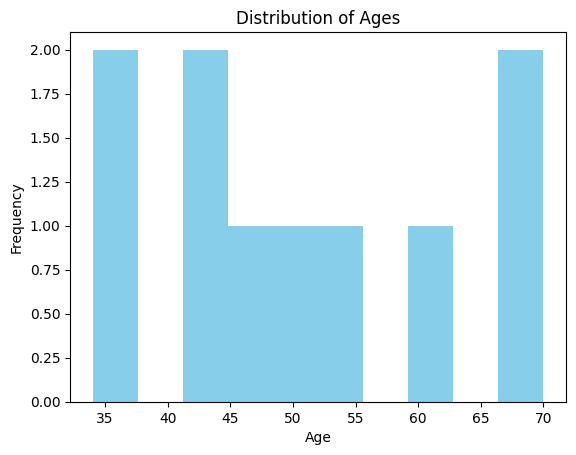

In [41]:
import matplotlib.pyplot as plt

# Plot a histogram of ages
plt.hist(df['age'], bins=10, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

In [100]:
api_key = 'abc'

api_url = f'	https://data.covid19india.org/v4/min/timeseries.min.json'

# Make the API request
response = requests.get(api_url)


if response.status_code == 200:
      covid_data = response.json()
      # Print the retrieved weather data
      df = pd.DataFrame(covid_data)
      print(df.head())
else:
      print("Failed to fetch covid data")

                                                      AN  \
dates  {'2020-03-26': {'delta': {'confirmed': 1}, 'de...   

                                                      AP  \
dates  {'2020-03-12': {'delta': {'confirmed': 1}, 'de...   

                                                      AR  \
dates  {'2020-04-02': {'delta': {'confirmed': 1}, 'de...   

                                                      AS  \
dates  {'2020-03-31': {'delta': {'confirmed': 1}, 'de...   

                                                      BR  \
dates  {'2020-03-22': {'delta': {'confirmed': 2}, 'de...   

                                                      CH  \
dates  {'2020-03-19': {'delta': {'confirmed': 1}, 'de...   

                                                      CT  \
dates  {'2020-03-19': {'delta': {'confirmed': 1}, 'de...   

                                                      DL  \
dates  {'2020-03-02': {'delta': {'confirmed': 1}, 'de...   

                                

In [101]:
df.describe()

,AN,AP,AR,AS,BR,CH,CT,DL,DN,GA,...,RJ,SK,TG,TN,TR,TT,UN,UP,UT,WB
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,"{'2020-03-26': {'delta': {'confirmed': 1}, 'de...","{'2020-03-12': {'delta': {'confirmed': 1}, 'de...","{'2020-04-02': {'delta': {'confirmed': 1}, 'de...","{'2020-03-31': {'delta': {'confirmed': 1}, 'de...","{'2020-03-22': {'delta': {'confirmed': 2}, 'de...","{'2020-03-19': {'delta': {'confirmed': 1}, 'de...","{'2020-03-19': {'delta': {'confirmed': 1}, 'de...","{'2020-03-02': {'delta': {'confirmed': 1}, 'de...","{'2020-04-09': {'delta': {'tested': 80}, 'delt...","{'2020-03-25': {'delta': {'confirmed': 3}, 'de...",...,"{'2020-03-03': {'delta': {'confirmed': 1}, 'de...","{'2020-05-04': {'delta': {'tested': 170}, 'del...","{'2020-03-02': {'delta': {'confirmed': 1}, 'de...","{'2020-03-07': {'delta': {'confirmed': 1}, 'de...","{'2020-04-06': {'delta': {'confirmed': 1}, 'de...","{'2020-01-30': {'delta': {'confirmed': 1}, 'de...","{'2020-05-19': {'delta': {'confirmed': 814}, '...","{'2020-03-04': {'delta': {'confirmed': 7}, 'de...","{'2020-03-15': {'delta': {'confirmed': 1}, 'de...","{'2020-03-17': {'delta': {'confirmed': 1}, 'de..."
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [102]:
print(list(df.keys()))

['AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DL', 'DN', 'GA', 'GJ', 'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'LA', 'LD', 'MH', 'ML', 'MN', 'MP', 'MZ', 'NL', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TG', 'TN', 'TR', 'TT', 'UN', 'UP', 'UT', 'WB']


In [103]:
df.to_csv("covid.csv")


In [105]:
from google.colab import files

files.download('covid.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
df2 =pd.read_csv('covid.csv')

In [109]:
print(df2.head())

  Unnamed: 0                                                 AN  \
0      dates  {'2020-03-26': {'delta': {'confirmed': 1}, 'de...   

                                                  AP  \
0  {'2020-03-12': {'delta': {'confirmed': 1}, 'de...   

                                                  AR  \
0  {'2020-04-02': {'delta': {'confirmed': 1}, 'de...   

                                                  AS  \
0  {'2020-03-31': {'delta': {'confirmed': 1}, 'de...   

                                                  BR  \
0  {'2020-03-22': {'delta': {'confirmed': 2}, 'de...   

                                                  CH  \
0  {'2020-03-19': {'delta': {'confirmed': 1}, 'de...   

                                                  CT  \
0  {'2020-03-19': {'delta': {'confirmed': 1}, 'de...   

                                                  DL  \
0  {'2020-03-02': {'delta': {'confirmed': 1}, 'de...   

                                                  DN  ...  \
0  {'2020-04-